<a href="https://colab.research.google.com/github/himanshuarora1703/Tutorial-notebooks/blob/main/Impute%20Missing%20Values/CCA(complete_case_analysis)_for_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [37]:
# check for missing values

df.isna().mean()

enrollee_id               0.000000
city                      0.000000
city_development_index    0.025003
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
training_hours            0.039983
target                    0.000000
dtype: float64

In [7]:
na_series = df.isna().mean() 

In [12]:
# select the columns where only 5% of data is missing
sel_cols = na_series[(na_series < 0.05) & (na_series > 0)].index

In [14]:
df[sel_cols].dtypes

city_development_index    float64
enrolled_university        object
education_level            object
experience                float64
training_hours            float64
dtype: object

In [18]:
num_cols = sel_cols[[0,3,4]]
cat_cols = sel_cols[[1,2]]

In [21]:
new_df = df[sel_cols].copy()

In [22]:
new_df.dropna(inplace=True)

In [23]:
# percentage of rows present in the new_df without the missing values

(len(new_df)/len(df)) * 100

89.68577095730244

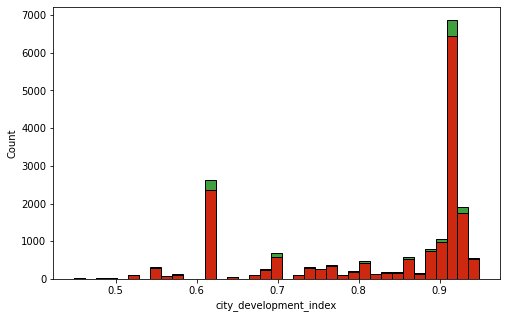

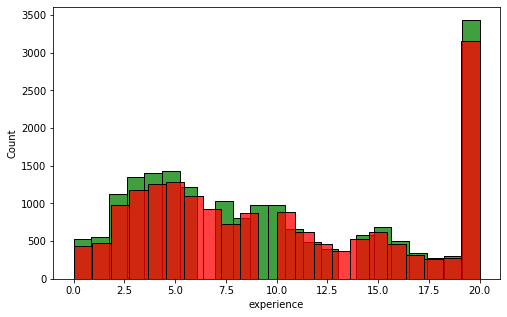

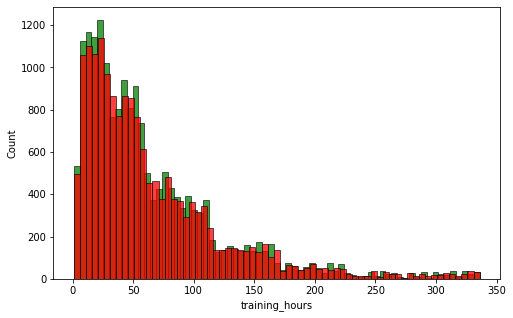

In [28]:
# plot the distribution of all columns

for col in num_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(x=col,data=df,color='green')
    sns.histplot(x=col,data=new_df,color='red')
    plt.show()

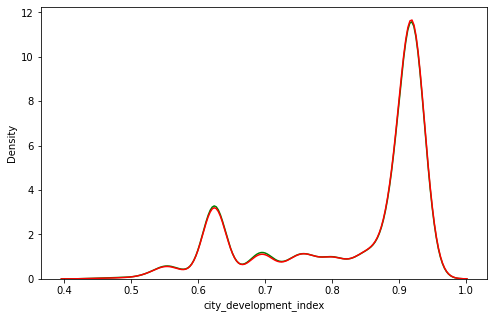

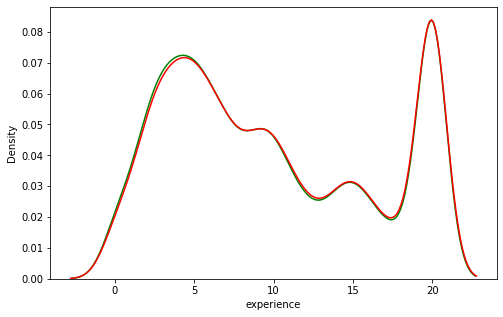

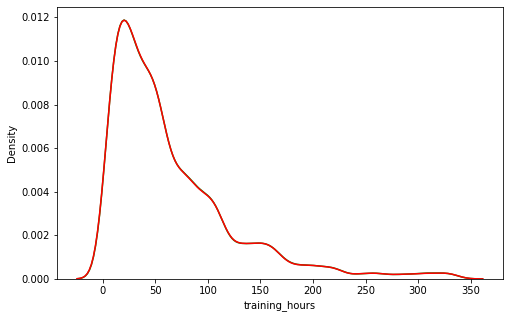

In [29]:
# plot the kde of all numerical columns

for col in num_cols:
    plt.figure(figsize=(8,5))
    sns.kdeplot(x=col,data=df,color='green')
    sns.kdeplot(x=col,data=new_df,color='red')
    plt.show()

In [38]:
# check for the distribution of cat columns

for i in cat_cols:
    print(df[i].value_counts())

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64


In [43]:
df.shape

(19158, 13)

In [45]:
# check for the distribution of cat columns

for i in cat_cols:
    print((df[i].value_counts(dropna=False)/len(df)))

no_enrollment       0.721213
Full time course    0.196106
Part time course    0.062533
NaN                 0.020148
Name: enrolled_university, dtype: float64
Graduate          0.605387
Masters           0.227633
High School       0.105282
NaN               0.024011
Phd               0.021610
Primary School    0.016077
Name: education_level, dtype: float64


In [46]:
# check for the distribution of cat columns

for i in cat_cols:
    print(df[i].value_counts(normalize=True,dropna=False))

no_enrollment       0.721213
Full time course    0.196106
Part time course    0.062533
NaN                 0.020148
Name: enrolled_university, dtype: float64
Graduate          0.605387
Masters           0.227633
High School       0.105282
NaN               0.024011
Phd               0.021610
Primary School    0.016077
Name: education_level, dtype: float64


In [54]:
cat_cols

Index(['enrolled_university', 'education_level'], dtype='object')

In [53]:
# for enrolled university column

pd.concat([df[cat_cols[0]].value_counts(normalize=True),new_df[cat_cols[0]].value_counts(normalize=True)],axis=1)

,enrolled_university,enrolled_university
no_enrollment,0.736043,0.735188
Full time course,0.200139,0.200733
Part time course,0.063818,0.064079


In [55]:
# for education level column

pd.concat([df[cat_cols[1]].value_counts(normalize=True),new_df[cat_cols[1]].value_counts(normalize=True)],axis=1)

,education_level,education_level
Graduate,0.620280,0.619835
Masters,0.233234,0.234082
High School,0.107872,0.107380
Phd,0.022141,0.022116
Primary School,0.016472,0.016587
